In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline

In [2]:
x_int = np.linspace(20, 160, 1000) #za katere x-e izriše interpolacijsko funkcijo

x1 =  [20, 80, 100, 160]
x2 =  [20, 40, 80, 140, 160]
x3 =  [20, 40, 140, 160]

y1 = [10000, 100, 40, 7.1]
y2 = [6200, 1000, 70, 9.8, 6.4]
y3 = [4100, 700, 8 , 5.6]

funkc1 = interp1d(x1, np.log(y1), 2)

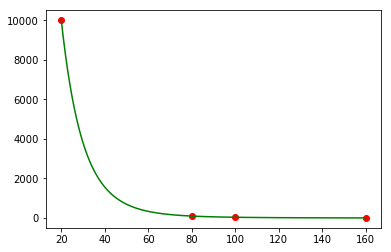

In [3]:
plt.plot(x1, y1, 'ro')
plt.plot(x_int, np.e**funkc1(x_int), 'g')
plt.show()

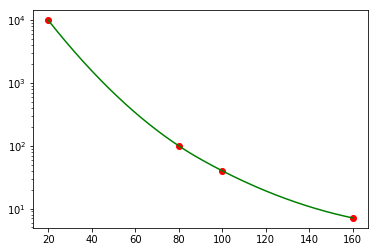

In [4]:
plt.plot(x1, y1, 'ro')
plt.plot(x_int, np.e**funkc1(x_int), 'g')
plt.yscale('log')
plt.show()

### Več podatkov:

In [5]:
x1 = [20, 40, 60, 80, 100, 120, 140, 160]
y1 = [10000, 1700, 350, 100,  40, 21, 12, 7.1]
funkc1 = interp1d(x1, np.log(y1), 3) #šezmeraj 2. stopnje
funkc11 = lambda x: np.exp(funkc1(x))

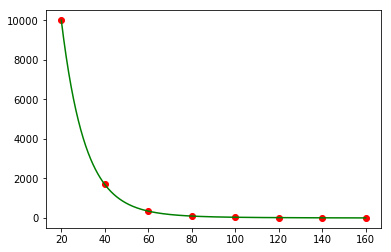

In [6]:
plt.plot(x1, y1, 'ro')
plt.plot(x_int, funkc11(x_int), 'g')
plt.show()

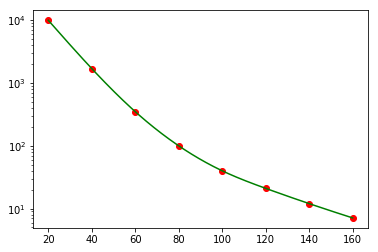

In [7]:
plt.plot(x1, y1, 'ro')
plt.plot(x_int, funkc11(x_int), 'g')
plt.yscale('log')
plt.show()

In [8]:
        tabela = {1500: [[20,10000],[60,320],[80,100],[100,40],[160,7.1]],
                      1000: [[20,6200],[40,1000],[100,30],[140,9.8],[160,6.4]],
                      680: [[20,4100],[40,700],[95,30],[140,8],[160,5.6]],
                      460: [[20,2500],[40,490],[80,45],[100,20],[160,4.9]],
                      320: [[20,1600],[40,300],[80,33],[120,9],[160,4]],
                      220: [[20,1000],[60,70],[110,10],[155,4],[160,3.7]],
                      150: [[20,630],[58,50],[80,20],[120,6.2],[160,3.1]],
                      100: [[20,370],[40,100],[100,8],[140,3.6],[160,2.8]],
                      68: [[20,230],[60,26],[100,6.7],[140,3],[160,2.45]],
                      46: [[20,145],[60,20],[80,9],[120,3.6],[160,2.1]],
                      32: [[20,85],[60,15],[100,4.1],[120,3],[160,1.9]],
                      22: [[20,52],[60,10],[100,3.5],[140,2],[160,1.75]],
                      15: [[20,32],[60,7],[100,2.9],[140,1.8],[160,1.6]],
                      10: [[20,19],[60,5],[100,2.2],[140,1.5],[160,1.4]],
                      7: [[20,14],[60,3.5],[100,1.8],[140,1.3],[160,1.2]],
                      5: [[20,9],[60,2.8],[100,1.6],[140,1.1],[160,1]],
                      3: [[20,3.8],[60,2.1],[100,1.4],[140,1.01],[160,1]],
                      2: [[20,2.2],[60,1.6],[100,1.2],[140,1],[160,1]]}

tabela_8 = {}
for olje in tabela.keys():
    tabela_8[olje] = np.array(tabela[olje])

funkc = {}

In [9]:
for olje in tabela_8.keys():
    funkc_zac = interp1d(tabela_8[olje][:,0], np.log(tabela_8[olje][:,1]), 3)
    funkc[olje] = lambda x, funkc=funkc_zac: np.exp(funkc(x)) #znotraj zanke je lambdi potrebno določiti privzeto vrednost(funkcijo),
                                                              #in to tisto, ki jo želimo "lambifirati"

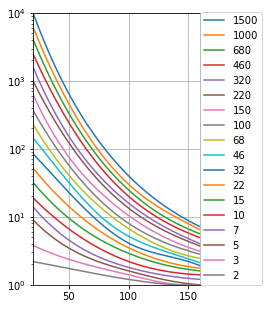

In [10]:
%matplotlib inline
plt.figure(figsize=(3,5))

for olje in funkc.keys():
    plt.plot(x_int, funkc[olje](x_int), label=olje)
plt.yscale('log')
plt.grid()
plt.xlim(20,160)
plt.ylim(1,10000)
plt.legend(loc=(1,0))
plt.show()

# Diagram 11

In [11]:
zac_vr1 = {100000:4, 50000:6.5, 20000:10, 10000:7.5, 5000:20.5, 3000:30, 2000:36, 1500:38 , 1000:45, 900:47, 800:52, 600:70,
           500:80, 400:100, 300:140, 200:180, 100:310, 50:540}
zac_vr = {}

for i in zac_vr1.keys():
    zac_vr[i] = np.log(zac_vr1[i]) + 0.5*np.log(10)
    
funkc = {}

In [12]:
for n_ in zac_vr.keys():
    funkc[n_] = lambda x, n = zac_vr[n_]: np.exp(-0.5 * np.log(x) + n)
    
n = 1455    

razlike_n = []
for n_prim in list(zac_vr1.keys()):
    razlike_n.append(abs(n_prim-n))

In [13]:
razlike_n.index(min(razlike_n))

7

In [14]:
n_cca = list(zac_vr1.keys())[razlike_n.index(min(razlike_n))]
n_cca

1500

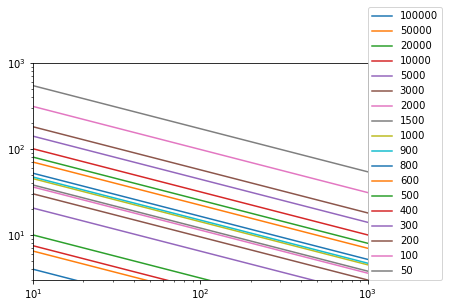

In [15]:
x_int = np.linspace(10,1000,1000)

for n in funkc.keys():
    plt.plot(x_int, funkc[n](x_int), label=n)
    
plt.xlim(10,1000)
plt.ylim(3,1000)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=(1,0))
plt.xlim(10,1000)
plt.ylim(3,1000)
plt.show()

In [16]:
funkcija = interp1d([100000,20000,2000,500,200,60], [4.5,10,30,80,150,500], kind=3)

In [17]:
funkcija(600)

array(109.17104171662761)

# Diagram 12

In [18]:
        diagram_12_raw = {4: [[0.005,0.39],[0.01,0.59],[0.1,8],[0.2,35]],
                      3: [[0.005,0.38],[0.01,0.53],[0.1,5],[0.25,50]],
                      2: [[0.005,0.35],[0.01,0.48],[0.1,4.2],[0.31,50]],
                      1.5: [[0.005,0.31],[0.01,0.43],[0.1,3.5],[0.37,50]],
                      1: [[0.005,0.29],[0.01,0.39],[0.1,2.5],[0.48,50]],
                      0.8: [[0.005,0.25],[0.01,0.31],[0.1,1.6],[0.7,50]],
                      0.6: [[0.005,0.2],[0.01,0.25],[0.1,0.8],[1.5,50]],
                      0.5: [[0.005,0.18],[0.01,0.21],[0.1,0.42],[2,25]],
                      0.4: [[0.005,0.16],[0.01,0.175],[0.1,0.31],[5,17]],
                      0.3: [[0.005,0.15],[0.01,0.16],[0.1,0.26],[5,5.5]],
                      0.2: [[0.005,0.13],[0.01,0.14],[0.1,0.19],[5,1.3]],
                      0.15: [[0.005,0.12],[0.01,0.125],[0.1,0.15],[5,0.5]]}

diagram_12 = {}
for kapa in diagram_12_raw.keys():
    diagram_12[kapa] = np.array(diagram_12_raw[kapa])

funkc_12 = {}

In [19]:
for kapa in diagram_12.keys():
    funkc_zac = interp1d(diagram_12[kapa][:,0], diagram_12[kapa][:,1], 2)
    funkc_12[kapa] = lambda x, funkc=funkc_zac: funkc(x)

In [20]:
funkc_12[0.4](0.3)

array(0.5418073825755666)

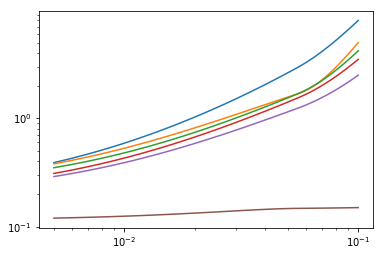

In [21]:
x_int = np.linspace(0.005, 0.1, 100)

plt.plot(x_int, funkc_12[4](x_int))
plt.plot(x_int, funkc_12[3](x_int))
plt.plot(x_int, funkc_12[2](x_int))
plt.plot(x_int, funkc_12[1.5](x_int))
plt.plot(x_int, funkc_12[1](x_int))
plt.plot(x_int, funkc_12[0.15](x_int))
plt.yscale('log')
plt.xscale('log')

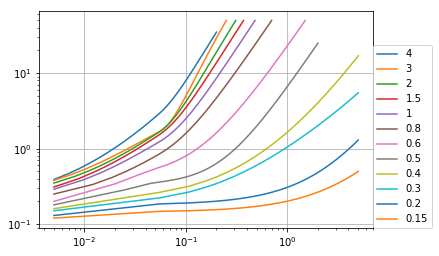

In [22]:
x_int = np.linspace(0.005, 0.1, 100)

%matplotlib inline

for kapa in funkc_12.keys():
    x_int = np.linspace(0.005, max(diagram_12[kapa][:,0]), 100)
    plt.plot(x_int, funkc_12[kapa](x_int), label=kapa)
plt.yscale('log')
plt.xscale('log')
#plt.xlim(5)
#plt.xlim(50)
plt.grid()
plt.legend(loc=(1,0))
plt.show()

# Diagram 7

In [53]:
podatki_7x = np.array([10, 40, 50, 70, 90, 120])
podatki_7y = np.array([1, 0.85, 0.82, 0.77, 0.74, 0.72])

In [54]:
funkc_7 = interp1d(podatki_7x , podatki_7y, 2)

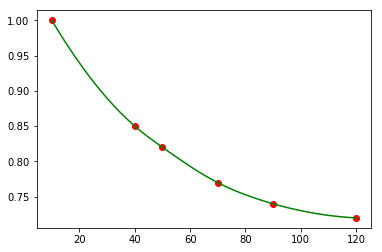

In [55]:
x_vec7 = np.linspace(10, 120, 100)

plt.plot(podatki_7x, podatki_7y, 'ro')
plt.plot(x_vec7, funkc_7(x_vec7), 'g')

# Diagram 8

In [89]:
podatki_8 = {2:np.array([[300,0.985], [750, 0.95],[1400,0.91]]), 
             4:np.array([[300,0.97],[800,0.895],[1400,0.85]]),
             6:np.array([[300,0.95],[900,0.85],[1400,0.81]]),
             10:np.array([[300,0.92],[900,0.8],[1400,0.75]]),
             20:np.array([[300,0.9],[900,0.75],[1400,0.69]]),
             40:np.array([[300,0.85],[800,0.705],[1400,0.64]]),
             100:np.array([[300,0.82],[800,0.66],[1400,0.57]]),
             'Lito':np.array([[300,0.8],[600,0.6],[810,0.5]])}

In [90]:
funkc_8 = {}

for R in podatki_8.keys():
    funkc_8[R] = interp1d(podatki_8[R][:,0], podatki_8[R][:,1], 2)

In [2]:
for R in funkc_8.keys():
    x_int = np.linspace(300, max(podatki_8[R][:,0]), 100)
    plt.plot(x_int, funkc_8[R](x_int), label=R)
plt.xlim(300,1400)
plt.ylim(0.5,1)
plt.legend(loc=(1,0))
plt.xlabel('Natezna trdnost Rm [Mpa]')
plt.ylabel('Koef. hrapavosti površine b2')
plt.title('Diagram odvisnosti b2 od hrapavosti površine in natezne trdnosti')
plt.grid()
plt.show()

NameError: name 'funkc_8' is not defined

## Diagram 1 in 2

In [3]:
podatki_1 = {0.07:np.array([[0.4,2.75], [0.7, 3.4],[1, 5.2]]), 
             0.1:np.array([[0.4,2.3],[0.7, 3],[1, 4.6]]),
             0.15:np.array([[0.4,2.1],[0.7, 2.6],[1, 3.8]]),
             0.2:np.array([[0.4,1.7],[0.7, 2.35],[1, 3.5]]),
             0.3:np.array([[0.4,1.6],[0.7, 2.15],[1, 3.1]]),
             0.5:np.array([[0.4,1.3],[0.7, 1.8],[1, 2.5]]),
             1:np.array([[0.4,1.2],[0.7,1.5],[1, 2.1]]),
             2:np.array([[0.4,1.15],[0.7,1.3],[1, 1.65]])}

In [4]:
funkc_1 = {}

for R in podatki_1.keys():
    funkc_1[R] = interp1d(podatki_1[R][:,0], podatki_1[R][:,1], 2)

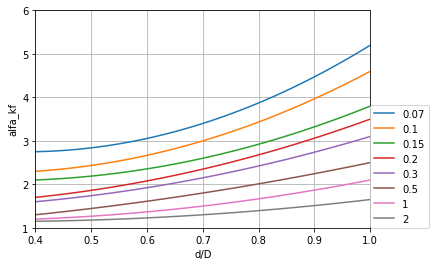

In [22]:
for R in funkc_1.keys():
    x_int = np.linspace(0.4, 1, 100)
    plt.plot(x_int, funkc_1[R](x_int), label=R)
plt.xlim(0.4,1)
plt.ylim(1,6)
plt.legend(loc=(1,0))
plt.ylabel('alfa_kf')
plt.xlabel('d/D')
plt.grid()
plt.show()

In [17]:
podatki_2 = {0.03:np.array([[0.4,2.2], [0.7,2.9],[1, 4.2]]), 
             0.04:np.array([[0.4,2],[0.7, 2.7],[1, 3.7]]),
             0.06:np.array([[0.4,1.8],[0.7, 2.4],[1, 3.2]]),
             0.1:np.array([[0.4,1.55],[0.7, 2],[1, 2.75]]),
             0.2:np.array([[0.4,1.45],[0.7, 1.7],[1, 2.2]]),
             0.4:np.array([[0.4,1.3],[0.7, 1.4],[1, 1.8]]),
             1:np.array([[0.4,1.15],[0.7,1.25],[1, 1.5]])}

In [18]:
funkc_2 = {}

for R in podatki_2.keys():
    funkc_2[R] = interp1d(podatki_2[R][:,0], podatki_2[R][:,1], 2)

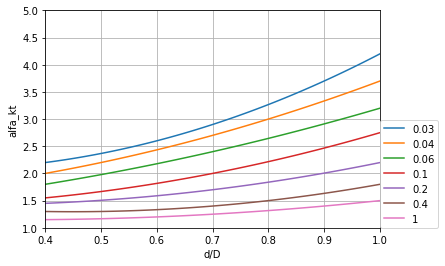

In [21]:
for R in funkc_2.keys():
    x_int = np.linspace(0.4, 1, 100)
    plt.plot(x_int, funkc_2[R](x_int), label=R)
plt.xlim(0.4,1)
plt.ylim(1,5)
plt.legend(loc=(1,0))
plt.ylabel('alfa_kt')
plt.xlabel('d/D')
plt.grid()
plt.show()